# Przewidywanie statusu firm z branży 4.0

### Cel
Celem projektu jest przygotowanie danych i porównanie płytkich oraz głębokich modeli uczenia maszynowego dla otrzymanego zbioru danych.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
import glob

### PKD - Polska Klasyfikacja Działalności

W projekcie będziemy analizowali dane dla firm z następującymi kodami *pkd*:
- 2712Z - Produkcja aparatury rozdzielczej i sterowniczej energii elektrycznej
- 2790Z - Produkcja pozostałego sprzętu elektrycznego
- 2841Z - Produkcja maszyn do obróbki metalu
- 2899Z - Produkcja pozostałych maszyn specjalnego przeznaczenia, gdzie indziej niesklasyfikowana
- 3312Z - Naprawa i konserwacja maszyn
- 3320Z - Instalowanie maszyn przemysłowych, sprzętu i wyposażenia
- 4321Z - Wykonywanie instalacji elektrycznych

In [2]:
pkd_bazowe = ['2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z']

In [3]:
csv_columns = ['nazwa','adresDzialanosci_gmina',
'adresDzialanosci_miasto', 'wlasciciel_imie', 'wlasciciel_nazwisko',
'2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z',
'pkd_total', 'data_rozpoczecia', 'data_zakonczenia','data_wykreslenia', 'status']

with open('./data/data.csv', "w", newline='', encoding="utf8") as output:
    writer = csv.DictWriter(output, fieldnames=csv_columns)
    writer.writeheader()

    for f_path in glob.glob('./UJ/ceidg/firmy/12/**/*.json'):
        with open(f_path, encoding="utf8") as f:
            data = json.load(f)
            data_output = dict()

            try:
                data_output['nazwa'] = data['firma'][0]['nazwa']
            except:
                data_output['nazwa'] = "NaN"
            
            try:
                data_output['adresDzialanosci_gmina'] = data['firma'][0]['adresDzialanosci']['gmina']
            except:
                data_output['adresDzialanosci_gmina'] = "NaN"
            
            try:
                data_output['adresDzialanosci_miasto'] = data['firma'][0]['adresDzialanosci']['miasto']
            except:
                data_output['adresDzialanosci_miasto'] = "NaN"

            try:
                data_output['wlasciciel_imie'] = data['firma'][0]['wlasciciel']['imie']
            except:
                data_output['wlasciciel_imie'] = "NaN"
            
            try:
                data_output['wlasciciel_nazwisko'] = data['firma'][0]['wlasciciel']['nazwisko']
            except:
                data_output['wlasciciel_nazwisko'] = "NaN"


            pkd = []
            try:
                pkd.append(data['firma'][0]['pkdGlowny'])
            except:
                pass
            try:
                pkd += data['firma'][0]['pkd']
            except:
                pass
            pkd = set(pkd)

            for pkd_baz in pkd_bazowe:
                if pkd_baz in pkd:
                    data_output[pkd_baz] = "1"
                else:
                    data_output[pkd_baz] = "0"

            data_output['pkd_total'] = len(pkd)


            try:
                data_output['data_rozpoczecia'] = data['firma'][0]['dataRozpoczecia']
            except:
                data_output['data_rozpoczecia'] = "NaN"

            try:
                data_output['data_zakonczenia'] = data['firma'][0]['dataZakonczenia']
            except:
                data_output['data_zakonczenia'] = "NaN"

            try:
                data_output['data_wykreslenia'] = data['firma'][0]['dataWykreslenia']
            except:
                data_output['data_wykreslenia'] = "NaN"

            try:
                data_output['status'] = data['firma'][0]['status']
            except:
                data_output['status'] = "NaN"


            writer.writerow(data_output)

In [86]:
df = pd.read_csv('./data/data.csv')

In [87]:
print(df.shape)

(67550, 17)


In [88]:
df.sample(3)

,nazwa,adresDzialanosci_gmina,adresDzialanosci_miasto,wlasciciel_imie,wlasciciel_nazwisko,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,data_zakonczenia,data_wykreslenia,status
63841,AirCon Design Marek Olipra,Kraków,Kraków,Marek,Olipra,0,0,0,0,1,0,1,9,2021-10-04,NaN,NaN,AKTYWNY
12838,"Tomasz Adamek ""KT - INSTAL"" Usługi instalacji ...",Skała,Zamłynie,TOMASZ,ADAMEK,0,0,0,0,0,0,1,12,2009-01-01,NaN,NaN,AKTYWNY
18035,DM BUD DARIUSZ MARCZYKIEWICZ,Kocmyrzów-Luborzyca,Baranówka,DARIUSZ,MARCZYKIEWICZ,0,0,0,0,0,0,1,17,2020-06-15,NaN,NaN,AKTYWNY


In [89]:
df.columns

Index(['nazwa', 'adresDzialanosci_gmina', 'adresDzialanosci_miasto',
       'wlasciciel_imie', 'wlasciciel_nazwisko', '2712Z', '2790Z', '2841Z',
       '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total', 'data_rozpoczecia',
       'data_zakonczenia', 'data_wykreslenia', 'status'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67550 entries, 0 to 67549
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nazwa                    67068 non-null  object
 1   adresDzialanosci_gmina   67064 non-null  object
 2   adresDzialanosci_miasto  67056 non-null  object
 3   wlasciciel_imie          67068 non-null  object
 4   wlasciciel_nazwisko      67068 non-null  object
 5   2712Z                    67550 non-null  int64 
 6   2790Z                    67550 non-null  int64 
 7   2841Z                    67550 non-null  int64 
 8   2899Z                    67550 non-null  int64 
 9   3312Z                    67550 non-null  int64 
 10  3320Z                    67550 non-null  int64 
 11  4321Z                    67550 non-null  int64 
 12  pkd_total                67550 non-null  int64 
 13  data_rozpoczecia         67068 non-null  object
 14  data_zakonczenia         19268 non-nul

In [91]:
df.drop(['nazwa', 'wlasciciel_imie', 'wlasciciel_nazwisko'], inplace=True, axis=1)
df.columns

Index(['adresDzialanosci_gmina', 'adresDzialanosci_miasto', '2712Z', '2790Z',
       '2841Z', '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total',
       'data_rozpoczecia', 'data_zakonczenia', 'data_wykreslenia', 'status'],
      dtype='object')

In [92]:
df.sample(3)

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,data_zakonczenia,data_wykreslenia,status
1081,Drwinia,Dziewin,0,0,0,0,0,0,1,11,2017-09-05,NaN,NaN,ZAWIESZONY
7055,Brzesko,Okocim,0,0,0,0,0,0,1,8,2009-02-01,NaN,NaN,AKTYWNY
30035,Wolbrom,Wolbrom,0,0,0,0,1,1,1,82,1994-06-10,NaN,NaN,WYLACZNIE_W_FORMIE_SPOLKI


<AxesSubplot:xlabel='status'>

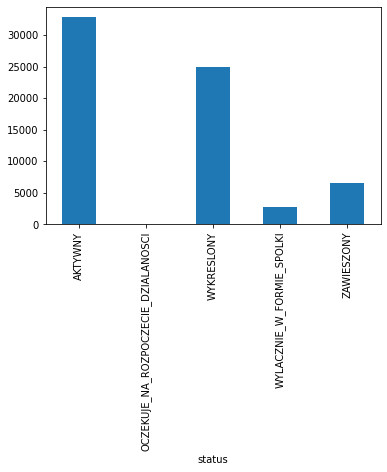

In [93]:
status = df.groupby(['status']).size()
status.plot(kind="bar")

<AxesSubplot:xlabel='status'>

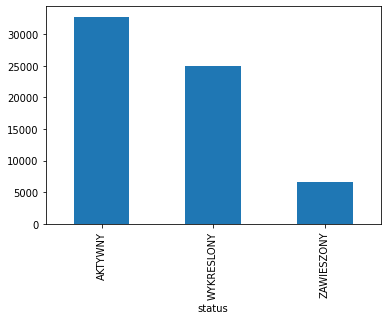

In [94]:
df = df[(df['status'] != 'WYLACZNIE_W_FORMIE_SPOLKI') & (df['status'] != 'OCZEKUJE_NA_ROZPOCZECIE_DZIALANOSCI')]

status = df.groupby(['status']).size()
status.plot(kind="bar")

<AxesSubplot:xlabel='adresDzialanosci_gmina'>

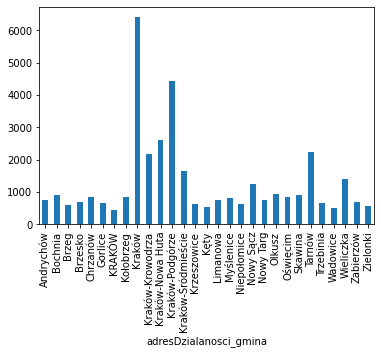

In [95]:
gminy = df.groupby(['adresDzialanosci_gmina']).size()

gminy = gminy.where(gminy > 430)
gminy = gminy.dropna()
gminy.plot(kind="bar")

<AxesSubplot:xlabel='data_rozpoczecia'>

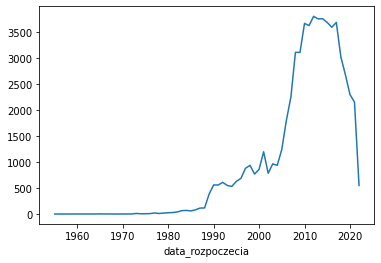

In [96]:
df['data_rozpoczecia'] = pd.to_datetime(df['data_rozpoczecia'])

lata = df.groupby(df['data_rozpoczecia'].map(lambda x: x.year)).size()
lata.plot()

<AxesSubplot:xlabel='data_zakonczenia'>

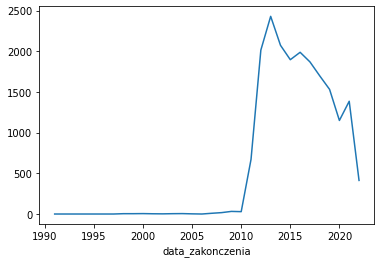

In [97]:
df['data_zakonczenia'] = pd.to_datetime(df['data_zakonczenia'])

lata = df.groupby(df['data_zakonczenia'].map(lambda x: x.year)).size()
lata.plot()

<AxesSubplot:xlabel='data_wykreslenia'>

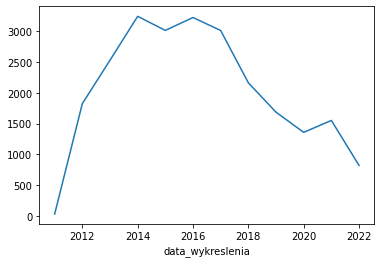

In [98]:
df['data_wykreslenia'] = pd.to_datetime(df['data_wykreslenia'])

lata = df.groupby(df['data_wykreslenia'].map(lambda x: x.year)).size()
lata.plot()

Usuwanie firm, które zamknęły się wcześniej niż covid

In [99]:
df = df.drop(df[df['data_zakonczenia'].dt.year < 2019].index)

In [100]:
df.shape

(50035, 14)

In [101]:
df['zamkniete_przez_covid'] = 0

df.loc[(df['data_zakonczenia'].dt.year >= 2019) | (df['data_wykreslenia'].dt.year >= 2019), 'zamkniete_przez_covid'] = 1

In [102]:
ilosc_firm_zamknietych_przez_covid = df['zamkniete_przez_covid'].sum() 
ilosc_firm_aktywnych_pomimo_covid = df.shape[0] - ilosc_firm_zamknietych_przez_covid

In [103]:
print(ilosc_firm_zamknietych_przez_covid)
print(ilosc_firm_aktywnych_pomimo_covid)

4923
45112


In [104]:
df

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,data_zakonczenia,data_wykreslenia,status,zamkniete_przez_covid
0,Bochnia,Stanisławice,0,0,0,0,1,1,1,74,1989-10-10,NaT,NaT,AKTYWNY,0
3,Bochnia,Bochnia,0,0,0,0,0,0,1,19,1998-06-15,2021-10-31,2021-11-01,WYKRESLONY,1
4,Bochnia,Bochnia,0,0,0,0,1,0,1,20,2013-02-08,NaT,NaT,ZAWIESZONY,0
5,Nowy Wiśnicz,Nowy Wiśnicz,0,0,0,0,0,0,1,32,1988-09-07,NaT,NaT,AKTYWNY,0
6,Bochnia,Bochnia,0,0,0,0,0,0,0,35,1989-06-01,NaT,NaT,AKTYWNY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67545,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67546,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67547,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67548,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0


In [105]:
df.tail(5)

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,data_zakonczenia,data_wykreslenia,status,zamkniete_przez_covid
67545,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67546,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67547,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67548,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0
67549,NaN,NaN,0,0,0,0,0,0,0,0,NaT,NaT,NaT,NaN,0


In [107]:
df = df[~df['data_rozpoczecia'].isnull()]

print(df.shape)

(49553, 15)


In [108]:
df

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,data_zakonczenia,data_wykreslenia,status,zamkniete_przez_covid
0,Bochnia,Stanisławice,0,0,0,0,1,1,1,74,1989-10-10,NaT,NaT,AKTYWNY,0
3,Bochnia,Bochnia,0,0,0,0,0,0,1,19,1998-06-15,2021-10-31,2021-11-01,WYKRESLONY,1
4,Bochnia,Bochnia,0,0,0,0,1,0,1,20,2013-02-08,NaT,NaT,ZAWIESZONY,0
5,Nowy Wiśnicz,Nowy Wiśnicz,0,0,0,0,0,0,1,32,1988-09-07,NaT,NaT,AKTYWNY,0
6,Bochnia,Bochnia,0,0,0,0,0,0,0,35,1989-06-01,NaT,NaT,AKTYWNY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67527,Tarnów,Tarnów,0,0,0,0,0,1,0,13,1999-09-05,NaT,NaT,AKTYWNY,0
67528,Tarnów,Tarnów,0,0,0,0,0,0,1,29,2005-01-17,NaT,NaT,AKTYWNY,0
67529,Tarnów,Tarnów,0,0,0,0,0,0,1,23,2005-03-01,NaT,NaT,AKTYWNY,0
67532,Tarnów,Tarnów,0,0,0,0,0,0,1,15,2018-01-18,2019-02-11,2019-05-15,WYKRESLONY,1
